## Create Area Monitoring with JSON

In [1]:
import json

def create_geojson_polygon(coordinates, output_file):
    feature_collection = {
        "type": "FeatureCollection",
        "features": [
            {
                "type": "Feature",
                "properties": {},
                "geometry": {
                    "type": "Polygon",
                    "coordinates": [coordinates]
                }
            }
        ]
    }

    with open(output_file, 'w') as json_file:
        json.dump(feature_collection, json_file, indent=2)

def parse_coordinates(input_string):
    coordinates_list = []
    lines = input_string.strip().split(';')
    for line in lines:
        lat, lon = map(float, line.strip().split(','))
        coordinates_list.append([lon, lat])  # Reversed order to match GeoJSON format
    return coordinates_list


In [2]:
# Example coordinates
input_coordinates = """

-7.943937635117735, 112.71637199680825;
-7.9438860507692715, 112.7176898705625;
-7.944062959954348, 112.71776004400303;
-7.944012414480676, 112.71811729060941;
-7.944625277930157, 112.71835332857243;
-7.944177015471495, 112.72014987609394;
-7.946104020618114, 112.7207617340482;
-7.947399357598347, 112.71740713915074;
-7.943937635117735, 112.71637199680825

"""

# Save GeoJSON to .json file
output_file_path = 'output_6.json'
coordinates_list = parse_coordinates(input_coordinates)
create_geojson_polygon(coordinates_list, output_file_path)

print(f'GeoJSON data has been saved to {output_file_path}')

GeoJSON data has been saved to output_6.json


## Make NDVI from Hyperspectral Band

C:\Users\mmasa\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


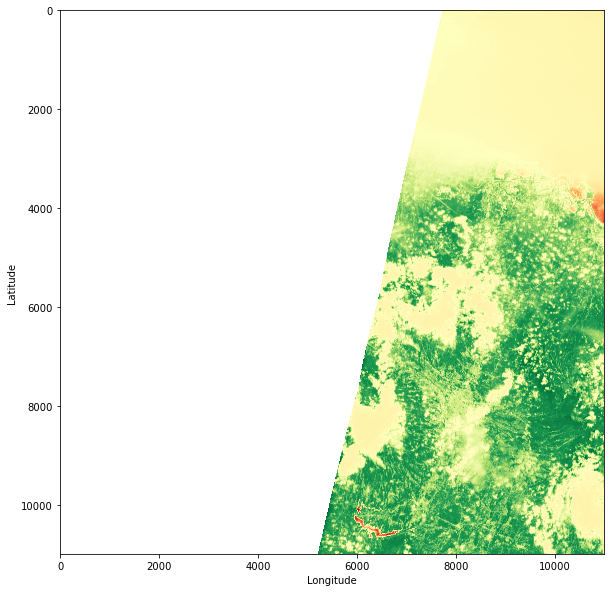

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the band 8 and band 4 images
band4 = plt.imread(r'Arlula Data\B04.tif').astype(float)
band8 = plt.imread(r'Arlula Data\B08.tif').astype(float)


# Calculate NDVI
ndvi = (band8 - band4) / (band8 + band4)

# Display the NDVI image
plt.figure(figsize=(15, 10))
plt.imshow(ndvi, cmap='RdYlGn')
plt.axis('on')  # Hide the axes
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

C:\Users\mmasa\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


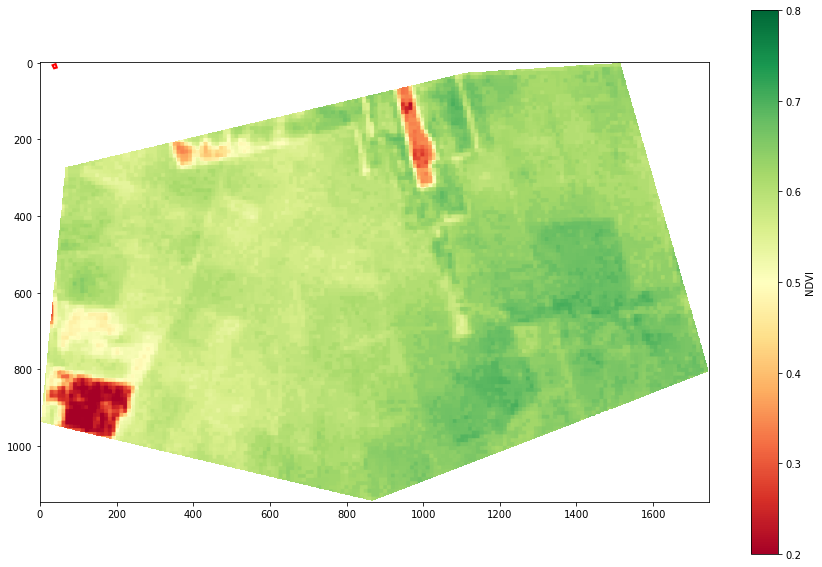

: 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

# Load the band 8 and band 4 images
band4 = plt.imread(r'Hasil Pengolahan\gee_abd_saleh\2021-04-05\band4_2021-04-05.tif').astype(float)
band8 = plt.imread(r'Hasil Pengolahan\gee_abd_saleh\2021-04-05\band8_2021-04-05.tif').astype(float)

# Calculate NDVI
ndvi = (band8 - band4) / (band8 + band4)

# Define the coordinates of the polygon (example coordinates)
site_1 = np.array([[4, 11], [7, 24], [16, 21], [11, 13]])
site_2 = np.array([[37, 20], [40, 27], [48, 23], [45, 17]])
site_3 = np.array([[33, 7], [37, 15], [44, 13], [41, 4]])

polygon_coords = site_3

# Create a figure and axes
plt.figure(figsize=(15, 10))
plt.imshow(ndvi, cmap='RdYlGn', vmin=0.2, vmax=0.8)
plt.colorbar(label='NDVI')

# Plot the polygon
polygon = Polygon(polygon_coords, edgecolor='red', linewidth=2, fill=False)
plt.gca().add_patch(polygon)

# Display the plot
plt.axis('on')
plt.show()

C:\Users\mmasa\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide


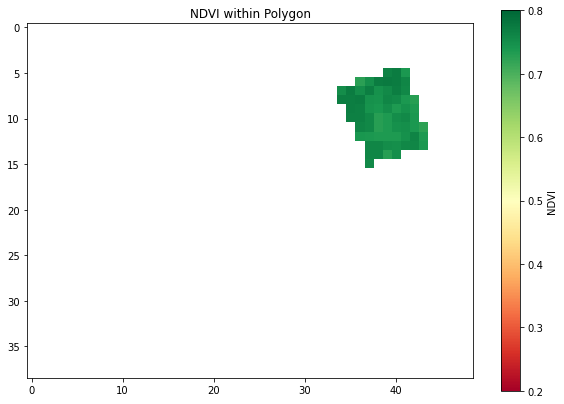

Average NDVI within the polygon: 0.7517762822265599


In [106]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

def crop_ndvi(ndvi, polygon_coords):
    # Create meshgrid of coordinates
    x_coords, y_coords = np.meshgrid(np.arange(ndvi.shape[1]), np.arange(ndvi.shape[0]))
    x_coords_flat = x_coords.flatten()
    y_coords_flat = y_coords.flatten()
    points = np.vstack((x_coords_flat, y_coords_flat)).T
    
    # Create polygon patch
    polygon = Polygon(polygon_coords, closed=True)
    
    # Check which points are within the polygon
    mask = polygon.contains_points(points)
    mask = mask.reshape(ndvi.shape)
    
    # Crop NDVI using the mask
    cropped_ndvi = np.where(mask, ndvi, np.nan)
    
    return cropped_ndvi

# Load the band 8 and band 4 images
band4 = plt.imread(r'Lokasi 6\EO_Browser_images\2023-05-15-00_00_2023-05-15-23_59_Sentinel-2_L2A_B04_(Raw).tiff').astype(float)
band8 = plt.imread(r'Lokasi 6\EO_Browser_images\2023-05-15-00_00_2023-05-15-23_59_Sentinel-2_L2A_B08_(Raw).tiff').astype(float)

# Calculate NDVI
ndvi = (band8 - band4) / (band8 + band4)

# Crop the NDVI within the polygon
cropped_ndvi = crop_ndvi(ndvi, polygon_coords)

# Display the cropped NDVI
plt.figure(figsize=(10, 7))
plt.imshow(cropped_ndvi, cmap='RdYlGn', vmin=0.2, vmax=0.8)
plt.colorbar(label='NDVI')
plt.title('NDVI within Polygon')
plt.axis('on')
plt.show()


# Print the average NDVI value within the polygon
average_ndvi = np.nanmean(cropped_ndvi)
print("Average NDVI within the polygon:", average_ndvi)

C:\Users\mmasa\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in true_divide


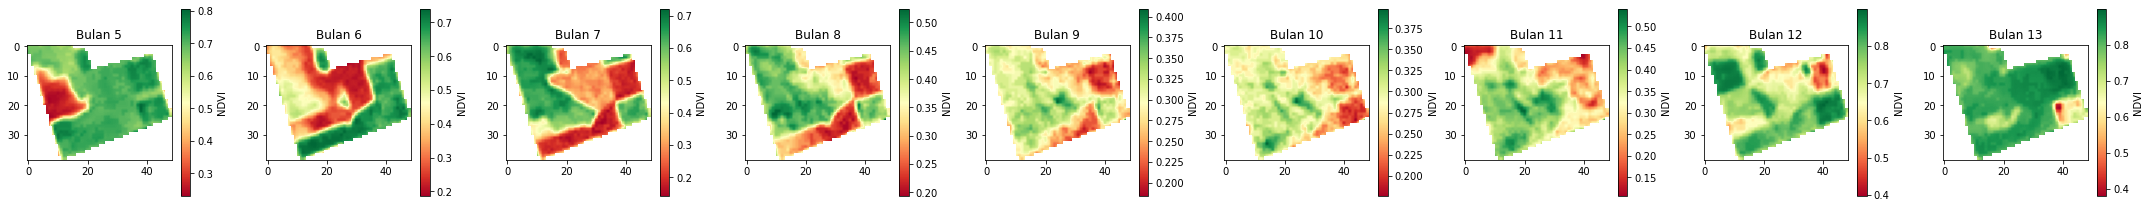

In [4]:
import numpy as np
import matplotlib.pyplot as plt

"""
band4_12 = r'EO_Browser_images (2)\2023-12-21-00_00_2023-12-21-23_59_Sentinel-2_L2A_B04_(Raw).tiff'
band4_10 = r'EO_Browser_images (1)\2023-10-27-00_00_2023-10-27-23_59_Sentinel-2_L2A_B04_(Raw).tiff'
band4_9 = r'EO_Browser_images\2023-09-22-00_00_2023-09-22-23_59_Sentinel-2_L2A_B04_(Raw).tiff'
band4_8 = r'EO_Browser_images (3)\2023-08-28-00_00_2023-08-28-23_59_Sentinel-2_L2A_B04_(Raw).tiff'
band4_7 = r'EO_Browser_images (4)\2023-07-29-00_00_2023-07-29-23_59_Sentinel-2_L2A_B04_(Raw).tiff'
band4_6 = r'EO_Browser_images (5)\2023-06-24-00_00_2023-06-24-23_59_Sentinel-2_L2A_B04_(Raw).tiff'
band4_5 = r'EO_Browser_images (6)\2023-05-20-00_00_2023-05-20-23_59_Sentinel-2_L2A_B04_(Raw).tiff'

band8_12 = r'EO_Browser_images (2)\2023-12-21-00_00_2023-12-21-23_59_Sentinel-2_L2A_B08_(Raw).tiff'
band8_10 = r'EO_Browser_images (1)\2023-10-27-00_00_2023-10-27-23_59_Sentinel-2_L2A_B08_(Raw).tiff'
band8_9 = r'EO_Browser_images\2023-09-22-00_00_2023-09-22-23_59_Sentinel-2_L2A_B08_(Raw).tiff'
band8_8 = r'EO_Browser_images (3)\2023-08-28-00_00_2023-08-28-23_59_Sentinel-2_L2A_B08_(Raw).tiff'
band8_7 = r'EO_Browser_images (4)\2023-07-29-00_00_2023-07-29-23_59_Sentinel-2_L2A_B08_(Raw).tiff'
band8_6 = r'EO_Browser_images (5)\2023-06-24-00_00_2023-06-24-23_59_Sentinel-2_L2A_B08_(Raw).tiff'
band8_5 = r'EO_Browser_images (6)\2023-05-20-00_00_2023-05-20-23_59_Sentinel-2_L2A_B08_(Raw).tiff'
"""

band4_5         = r"Lokasi 6\EO_Browser_images\2023-05-15-00_00_2023-05-15-23_59_Sentinel-2_L2A_B04_(Raw).tiff"
band4_6         = r"Lokasi 6\EO_Browser_images (1)\2023-06-24-00_00_2023-06-24-23_59_Sentinel-2_L2A_B04_(Raw).tiff"
band4_7         = r"Lokasi 6\EO_Browser_images (2)\2023-07-29-00_00_2023-07-29-23_59_Sentinel-2_L2A_B04_(Raw).tiff"
band4_8         = r"Lokasi 6\EO_Browser_images (3)\2023-08-28-00_00_2023-08-28-23_59_Sentinel-2_L2A_B04_(Raw).tiff"
band4_9         = r"Lokasi 6\EO_Browser_images (4)\2023-09-27-00_00_2023-09-27-23_59_Sentinel-2_L2A_B04_(Raw).tiff"
band4_10        = r"Lokasi 6\EO_Browser_images (5)\2023-10-27-00_00_2023-10-27-23_59_Sentinel-2_L2A_B04_(Raw).tiff"
band4_11        = r"Lokasi 6\EO_Browser_images (7)\2023-11-11-00_00_2023-11-11-23_59_Sentinel-2_L2A_B04_(Raw).tiff"
band4_12        = r"Lokasi 6\EO_Browser_images (6)\2023-12-21-00_00_2023-12-21-23_59_Sentinel-2_L2A_B04_(Raw).tiff"
band4_2_2024    = r"Lokasi 6\EO_Browser_images (8)\2024-02-19-00_00_2024-02-19-23_59_Sentinel-2_L2A_B04_(Raw).tiff"

band8_5         = r"Lokasi 6\EO_Browser_images\2023-05-15-00_00_2023-05-15-23_59_Sentinel-2_L2A_B08_(Raw).tiff"
band8_6         = r"Lokasi 6\EO_Browser_images (1)\2023-06-24-00_00_2023-06-24-23_59_Sentinel-2_L2A_B08_(Raw).tiff"
band8_7         = r"Lokasi 6\EO_Browser_images (2)\2023-07-29-00_00_2023-07-29-23_59_Sentinel-2_L2A_B08_(Raw).tiff"
band8_8         = r"Lokasi 6\EO_Browser_images (3)\2023-08-28-00_00_2023-08-28-23_59_Sentinel-2_L2A_B08_(Raw).tiff"
band8_9         = r"Lokasi 6\EO_Browser_images (4)\2023-09-27-00_00_2023-09-27-23_59_Sentinel-2_L2A_B08_(Raw).tiff"
band8_10        = r"Lokasi 6\EO_Browser_images (5)\2023-10-27-00_00_2023-10-27-23_59_Sentinel-2_L2A_B08_(Raw).tiff"
band8_11        = r"Lokasi 6\EO_Browser_images (7)\2023-11-11-00_00_2023-11-11-23_59_Sentinel-2_L2A_B08_(Raw).tiff"
band8_12        = r"Lokasi 6\EO_Browser_images (6)\2023-12-21-00_00_2023-12-21-23_59_Sentinel-2_L2A_B08_(Raw).tiff"
band8_2_2024    = r"Lokasi 6\EO_Browser_images (8)\2024-02-19-00_00_2024-02-19-23_59_Sentinel-2_L2A_B08_(Raw).tiff"

# Daftar nama file band 4 dan band 8
band4_files = [band4_5, band4_6, band4_7, band4_8, band4_9, band4_10, band4_11, band4_12, band4_2_2024]
band8_files = [band8_5, band8_6, band8_7, band8_8, band8_9, band8_10, band8_11, band8_12, band8_2_2024]

# Membuat list untuk menyimpan gambar NDVI dari setiap file
ndvi_images = []

# Memproses setiap file band 4 dan band 8
for band4_file, band8_file in zip(band4_files, band8_files):
    # Load gambar band 4 dan band 8
    band4 = plt.imread(band4_file).astype(float)
    band8 = plt.imread(band8_file).astype(float)
    
    ndvi = (band8 - band4) / (band8 + band4)
    
    ndvi_images.append(ndvi)

# Menampilkan gambar-gambar NDVI dalam satu figure
plt.figure(figsize=(30, 3))
for i, ndvi_image in enumerate(ndvi_images):
    plt.subplot(1, 9, i+1)
    plt.imshow(ndvi_image, cmap='RdYlGn')
    plt.colorbar(label='NDVI')
    n = 4 + i
    plt.title(f'Bulan {n+1}')

plt.tight_layout()
plt.show()

C:\Users\mmasa\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide


Average NDVI within the polygon: 0.7517762822265599
Average NDVI within the polygon: 0.649820057737055
Average NDVI within the polygon: 0.22245000435787413
Average NDVI within the polygon: 0.22968844261851423
Average NDVI within the polygon: 0.21823500603903684
Average NDVI within the polygon: 0.23306714657092809
Average NDVI within the polygon: 0.23484914649808444
Average NDVI within the polygon: 0.5461000421609735
Average NDVI within the polygon: 0.880977244001475


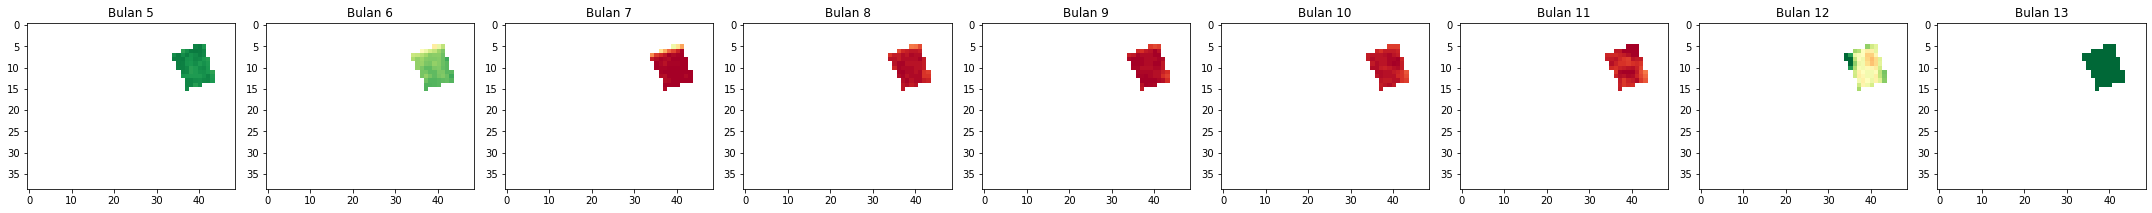

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import PathPatch
from matplotlib.path import Path

def crop_ndvi(ndvi, polygon_coords):
    # Create meshgrid of coordinates
    x_coords, y_coords = np.meshgrid(np.arange(ndvi.shape[1]), np.arange(ndvi.shape[0]))
    x_coords_flat = x_coords.flatten()
    y_coords_flat = y_coords.flatten()
    points = np.vstack((x_coords_flat, y_coords_flat)).T
    
    # Create polygon patch
    polygon = Polygon(polygon_coords, closed=True)
    
    # Check which points are within the polygon
    mask = polygon.contains_points(points)
    mask = mask.reshape(ndvi.shape)
    
    # Crop NDVI using the mask
    cropped_ndvi = np.where(mask, ndvi, np.nan)
    
    return cropped_ndvi

# Membuat list untuk menyimpan gambar NDVI dari setiap file
ndvi_images = []
mean_value = []

# Memproses setiap file band 4 dan band 8
for band4_file, band8_file in zip(band4_files, band8_files):
    # Load gambar band 4 dan band 8
    band4 = plt.imread(band4_file).astype(float)
    band8 = plt.imread(band8_file).astype(float)
    
    ndvi = (band8 - band4) / (band8 + band4)

    cropped_ndvi = crop_ndvi(ndvi, polygon_coords)
    ndvi_images.append(cropped_ndvi)

    mean_ndvi = np.nanmean(cropped_ndvi)
    mean_value.append(mean_ndvi)
    print("Average NDVI within the polygon:", mean_ndvi)

# Menampilkan gambar-gambar NDVI dalam satu figure
plt.figure(figsize=(30, 3))
for i, ndvi_image in enumerate(ndvi_images):
    plt.subplot(1, 9, i+1)
    plt.imshow(ndvi_image, cmap='RdYlGn', vmin=0.2, vmax=0.8)
    #plt.colorbar(label='NDVI')
    n = 4 + i
    plt.title(f'Bulan {n+1}')

plt.tight_layout()
plt.show()

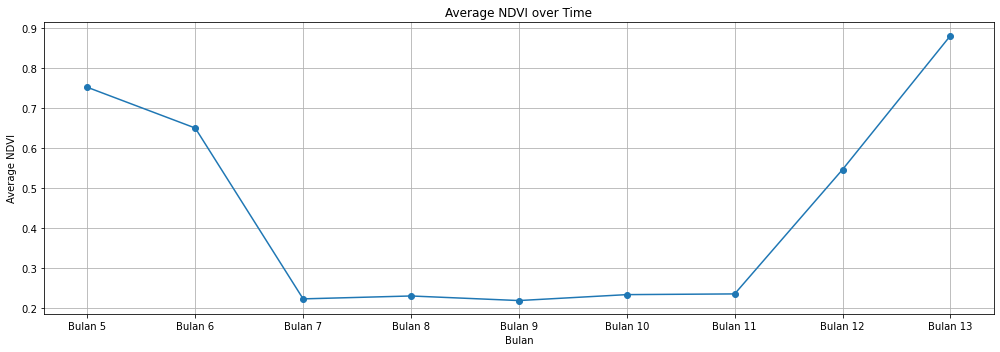

In [108]:
import matplotlib.pyplot as plt

# Plot grafik nilai rata-rata NDVI
plt.figure(figsize=(14, 5))
plt.plot(mean_value, marker='o', linestyle='-')
plt.title('Average NDVI over Time')
plt.xlabel('Bulan')
plt.ylabel('Average NDVI')
plt.grid(True)
plt.xticks(range(len(mean_value)), [f'Bulan {i+5}' for i in range(len(mean_value))])
plt.tight_layout()
plt.show()

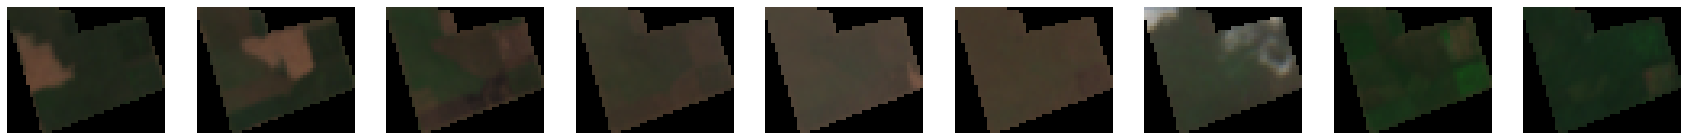

In [5]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# List of true color images
truecolor_files = [
#    r'EO_Browser_images (6)\2023-05-20-00_00_2023-05-20-23_59_Sentinel-2_L2A_True_color.tiff',
#    r'EO_Browser_images (5)\2023-06-24-00_00_2023-06-24-23_59_Sentinel-2_L2A_True_color.tiff',
#    r'EO_Browser_images (4)\2023-07-29-00_00_2023-07-29-23_59_Sentinel-2_L2A_True_color.tiff',
#    r'EO_Browser_images (3)\2023-08-28-00_00_2023-08-28-23_59_Sentinel-2_L2A_True_color.tiff',
#    r'EO_Browser_images\2023-09-22-00_00_2023-09-22-23_59_Sentinel-2_L2A_True_color.tiff',
#    r'EO_Browser_images (1)\2023-10-27-00_00_2023-10-27-23_59_Sentinel-2_L2A_True_color.tiff',
#    r'EO_Browser_images (2)\2023-12-21-00_00_2023-12-21-23_59_Sentinel-2_L2A_True_color.tiff'

    r'Lokasi 6\EO_Browser_images\2023-05-15-00_00_2023-05-15-23_59_Sentinel-2_L2A_True_color.tiff',
    r'Lokasi 6\EO_Browser_images (1)\2023-06-24-00_00_2023-06-24-23_59_Sentinel-2_L2A_True_color.tiff',
    r'Lokasi 6\EO_Browser_images (2)\2023-07-29-00_00_2023-07-29-23_59_Sentinel-2_L2A_True_color.tiff',
    r'Lokasi 6\EO_Browser_images (3)\2023-08-28-00_00_2023-08-28-23_59_Sentinel-2_L2A_True_color.tiff',
    r'Lokasi 6\EO_Browser_images (4)\2023-09-27-00_00_2023-09-27-23_59_Sentinel-2_L2A_True_color.tiff',
    r'Lokasi 6\EO_Browser_images (5)\2023-10-27-00_00_2023-10-27-23_59_Sentinel-2_L2A_True_color.tiff',
    r'Lokasi 6\EO_Browser_images (7)\2023-11-11-00_00_2023-11-11-23_59_Sentinel-2_L2A_True_color.tiff',
    r'Lokasi 6\EO_Browser_images (6)\2023-12-21-00_00_2023-12-21-23_59_Sentinel-2_L2A_True_color.tiff',
    r'Lokasi 6\EO_Browser_images (8)\2024-02-19-00_00_2024-02-19-23_59_Sentinel-2_L2A_True_color.tiff'
]

# Create a subplot for each image
fig, axs = plt.subplots(1, len(truecolor_files), figsize=(30, 7))

# Loop through each file and plot it
for i, file_path in enumerate(truecolor_files):
    # Read the image using PIL
    img = Image.open(file_path)
    
    # Convert the image to a NumPy array
    truecolor = np.array(img)
    
    # Plot the image
    axs[i].imshow(truecolor)
    axs[i].axis('off')  # Turn off axis labels
    #axs[i].set_title(file_path)

plt.show()

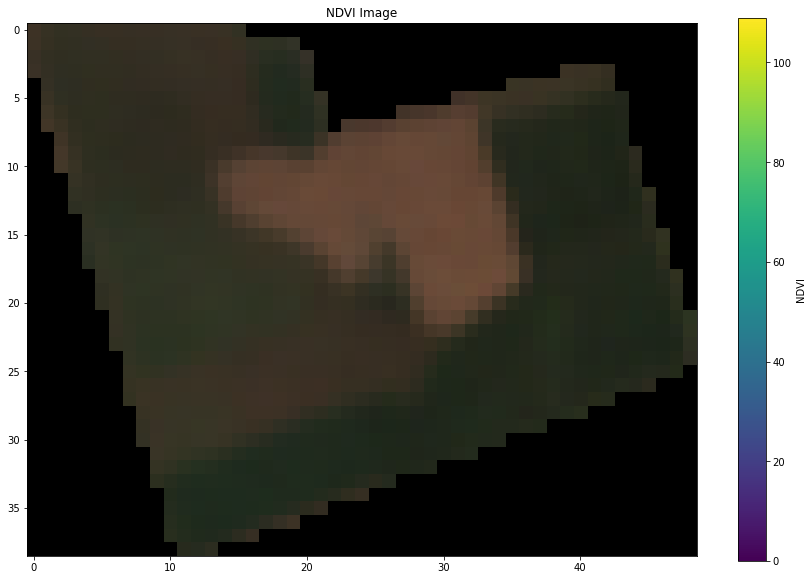

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate NDVI
ndvi = r'Lokasi 6\EO_Browser_images (1)\2023-06-24-00_00_2023-06-24-23_59_Sentinel-2_L2A_True_color.tiff'
img = Image.open(ndvi)
truecolor = np.array(img)

# Display the NDVI image
plt.figure(figsize=(15, 10))
plt.imshow(truecolor)
plt.colorbar(label='NDVI')
plt.title('NDVI Image')
plt.show()


### NDVI Threshold untuk Menentukan Pembagian Wilayah

C:\Users\mmasa\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


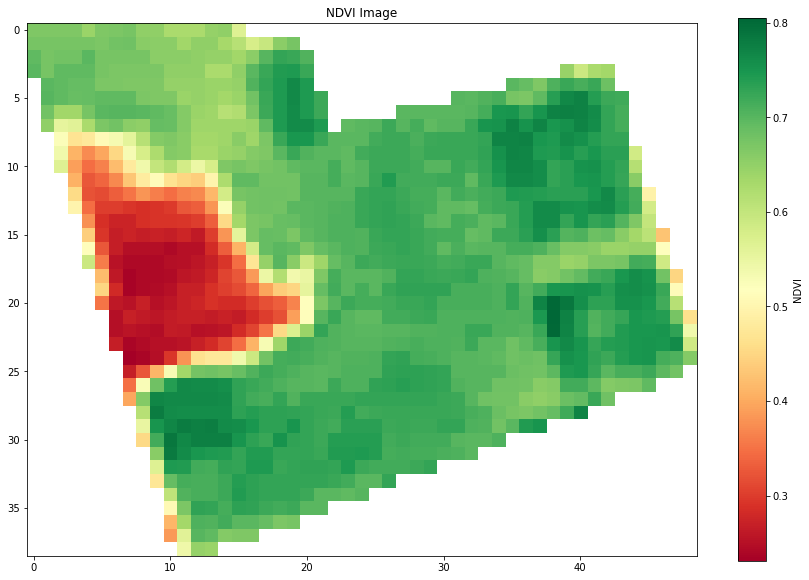

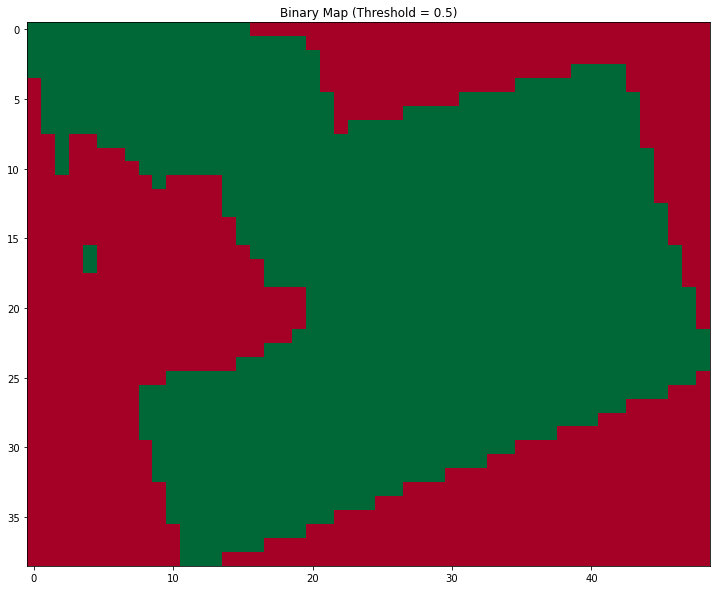

Size of the NDVI matrix: (39, 49)


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Load the band 8 and band 4 images
band4 = plt.imread(band4_5).astype(float)
band8 = plt.imread(band8_5).astype(float)

# Calculate NDVI
ndvi = (band8 - band4) / (band8 + band4)

# Ambang batas untuk memisahkan tanah dan rumput
threshold = 0.5

# Membuat peta biner (0 atau 1) berdasarkan ambang batas
binary_map = np.where(ndvi > threshold, 1, 0)

# Display the NDVI image
plt.figure(figsize=(15, 10))
plt.imshow(ndvi, cmap='RdYlGn')
plt.colorbar(label='NDVI')
plt.title('NDVI Image')
plt.show()

# Menampilkan peta biner
plt.figure(figsize=(15, 10))
plt.imshow(binary_map, cmap='RdYlGn')
plt.title('Binary Map (Threshold = {})'.format(threshold))
plt.show()

# Print the size of the NDVI matrix
print("Size of the NDVI matrix:", ndvi.shape)

### Clustering untuk Menentukan Pembagian Wilayah

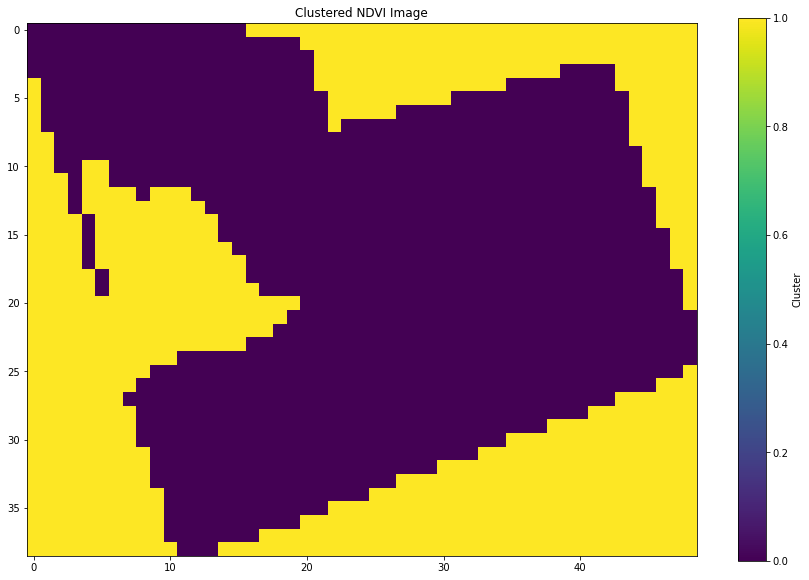

In [8]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Replace NaN and infinity values in ndvi with a constant value, such as 0
ndvi = np.nan_to_num(ndvi, nan=0.0, posinf=0.0, neginf=0.0)

# Reshape the NDVI image for clustering
ndvi_reshaped = ndvi.reshape((-1, 1))

# Perform KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(ndvi_reshaped)
labels = kmeans.labels_
clustered_ndvi = labels.reshape(ndvi.shape)

# Display the clustered NDVI image
plt.figure(figsize=(15, 10))
plt.imshow(clustered_ndvi, cmap='viridis')
plt.colorbar(label='Cluster')
plt.title('Clustered NDVI Image')
plt.show()

In [9]:
import numpy as np

# Count the number of pixels in each cluster
unique_labels, counts = np.unique(clustered_ndvi, return_counts=True)

# Calculate the area for each cluster
total_pixels = ndvi.shape[0] * ndvi.shape[1]
cluster_areas = counts / total_pixels

# Print the area for each cluster
for label, area in zip(unique_labels, cluster_areas):
    print(f"Cluster {label}: Area = {area * 100:.2f}%")

Cluster 0: Area = 59.13%
Cluster 1: Area = 40.87%


In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Load the band 8 and band 4 images
band4 = plt.imread(r'fokus area PT Gozco Plantation\2022-02-16-00_00_2022-02-16-23_59_Sentinel-2_L2A_B04_(Raw).tiff').astype(float)
band8 = plt.imread(r'fokus area PT Gozco Plantation\2022-02-16-00_00_2022-02-16-23_59_Sentinel-2_L2A_B08_(Raw).tiff').astype(float)

# Calculate NDVI
ndvi = (band8 - band4) / (band8 + band4)

# Set the threshold range
threshold_min = 0.68
threshold_max = 0.72

# Apply thresholding to NDVI
ndvi_thresholded = np.where((ndvi >= threshold_min) & (ndvi <= threshold_max), ndvi, 0)

# Display the NDVI thresholded image
plt.figure(figsize=(15, 10))
plt.imshow(ndvi_thresholded, cmap='RdYlGn')
plt.colorbar(label='NDVI')
plt.title('Thresholded NDVI Image (0.6 - 0.8)')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'fokus area PT Gozco Plantation\\2022-02-16-00_00_2022-02-16-23_59_Sentinel-2_L2A_B04_(Raw).tiff'

## Analisis Kelembaban Tanah

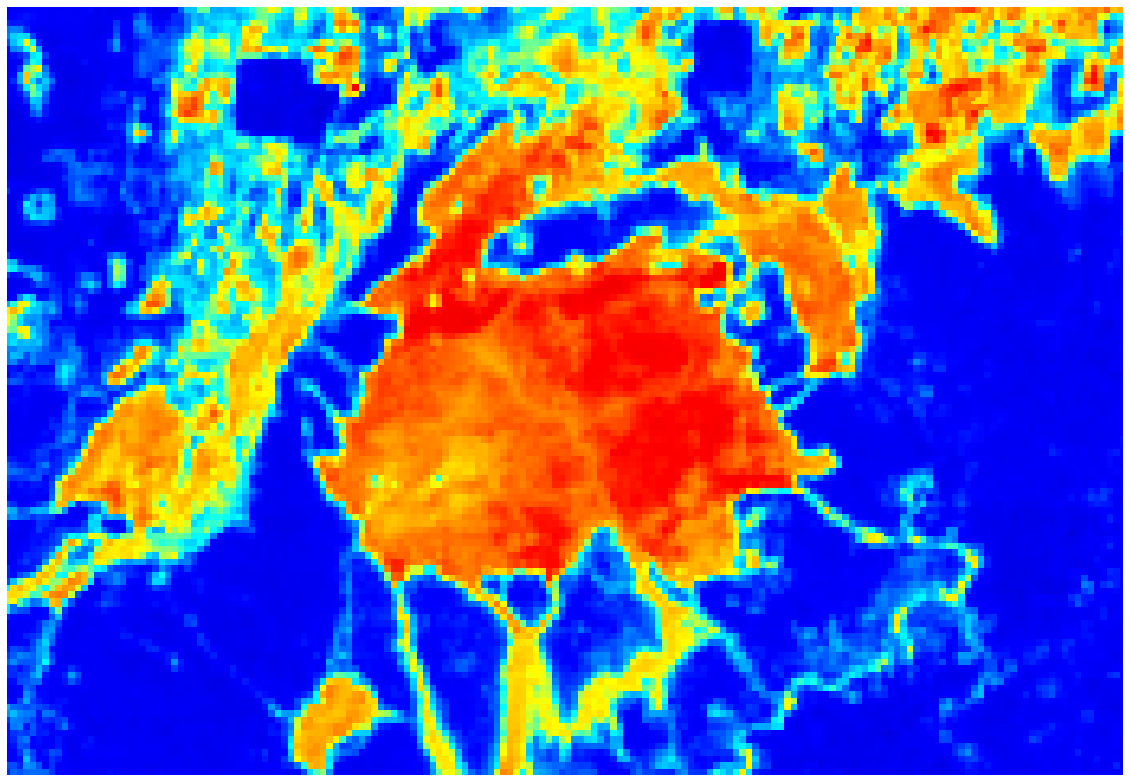

In [ ]:
# Load the image
img = mpimg.imread(r'Browser_images/2023-10-28-00_00_2023-10-28-23_59_Sentinel-2_L2A_Moisture_index.png')

# Create a larger figure
plt.figure(figsize=(20, 20))

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide the axes
plt.show()

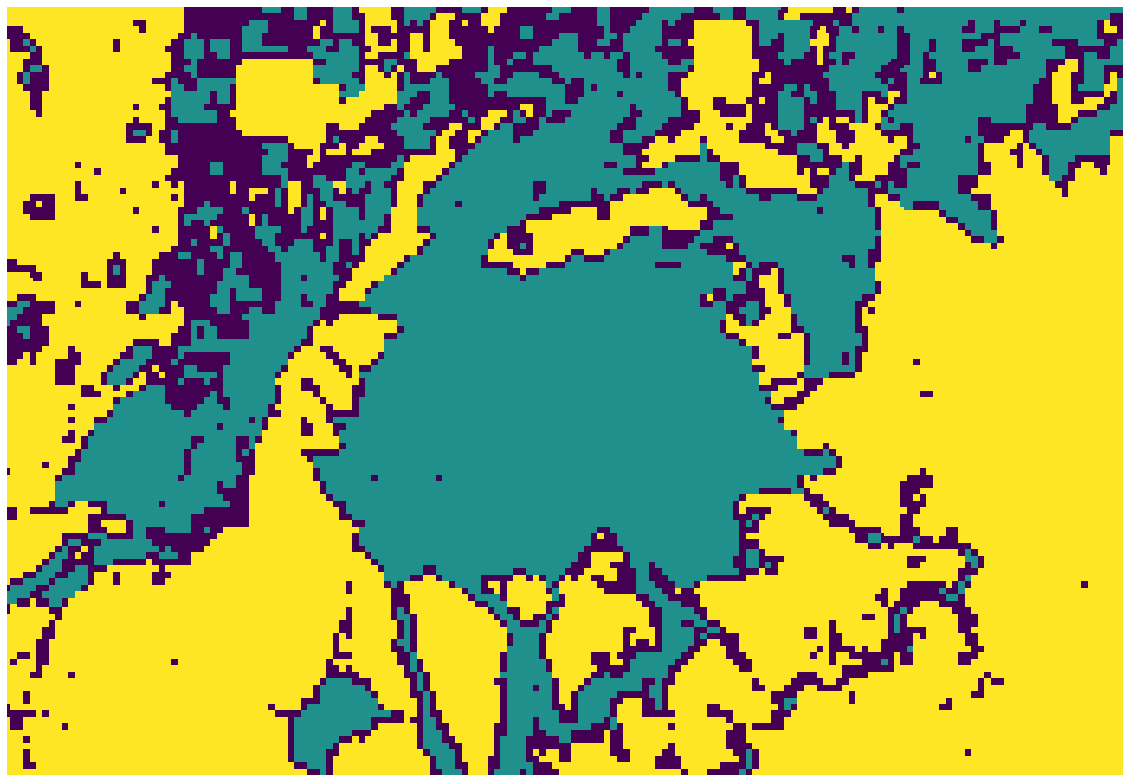

In [ ]:
import numpy as np
from sklearn.cluster import KMeans

# Get the image shape
height, width, _ = img.shape

# Reshape the image to a 2D array
pixels = img.reshape(height * width, -1)

# Perform clustering
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(pixels)

# Reshape the labels back to the original image shape
clustered_img = labels.reshape(height, width)

# Create a larger figure
plt.figure(figsize=(20, 20))

# Display the clustered image
plt.imshow(clustered_img)
plt.axis('off')  # Hide the axes
plt.show()

In [ ]:
import numpy as np
from sklearn.cluster import KMeans

cluster_counts = np.bincount(labels)
cluster_areas = cluster_counts / (height * width) * 100

for i, area in enumerate(cluster_areas):
    print(f"Cluster {i}: Area = {area:.2f}%")

Cluster 0: Area = 18.30%
Cluster 1: Area = 33.14%
Cluster 2: Area = 48.57%
